# HW4 - Hongyi Tang

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats

## 1 Simulations

1.1

In [103]:
admission = pd.read_csv("../data/college-admissions.csv.bz2")
admission.columns = [c.replace(' ', '_') for c in admission.columns]
data = admission[["Research", "Chance_of_Admit_"]]
data.head(3)

,Research,Chance_of_Admit_
0,1,0.92
1,1,0.76
2,1,0.72


In [104]:
data.shape

(400, 2)

In [105]:
# check if there is any missing values.
data.isnull().sum()

Research            0
Chance_of_Admit_    0
dtype: int64

In [106]:
# check if there is any invalid values for research
print(data.Research.describe())
print()
# type of data in research column
print(data.Research.value_counts())

count    400.000000
mean       0.547500
std        0.498362
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64

1    219
0    181
Name: Research, dtype: int64


In [107]:
# check if there is any invalid values for chance of admit
data.Chance_of_Admit_.describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Chance_of_Admit_, dtype: float64

1.2

Researchers are more likely to be admitted

In [108]:
researchers = data[data["Research"] == 1]
nonresearchers = data[data["Research"] == 0]

In [109]:
researchers.describe()

,Research,Chance_of_Admit_
count,219.0,219.000000
mean,1.0,0.795982
std,0.0,0.123051
min,1.0,0.360000
25%,1.0,0.730000
50%,1.0,0.800000
75%,1.0,0.900000
max,1.0,0.970000


In [110]:
nonresearchers.describe()

,Research,Chance_of_Admit_
count,181.0,181.000000
mean,0.0,0.637680
std,0.0,0.113784
min,0.0,0.340000
25%,0.0,0.570000
50%,0.0,0.650000
75%,0.0,0.720000
max,0.0,0.890000


In [111]:
researchers = data[data["Research"] == 1]

1.3

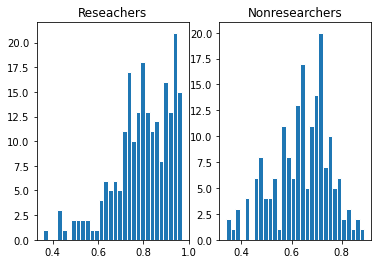

In [112]:
plt.figure()
ax = plt.subplot(1,2,1)
_ = ax.hist(researchers.Chance_of_Admit_, edgecolor="w", bins=30)
_ = ax.set_title("Reseachers")
ax = plt.subplot(1,2,2)
_ = ax.hist(nonresearchers.Chance_of_Admit_, edgecolor="w", bins=30)
_ = ax.set_title("Nonresearchers")
plt.show()
# Compare to reseachers, the chance of admit for nonresearchers is more normally distributed

1.4

In [128]:
ra = researchers.Chance_of_Admit_
na = nonresearchers.Chance_of_Admit_
# mean difference between admission rate 
mean_difference = ra.mean() - na.mean()
mean_difference

0.1583021771487675

1.5

In [114]:
overall_mean = data.Chance_of_Admit_.mean()
overall_std = data.Chance_of_Admit_.std()
print("overall mean is", overall_mean)
print("overall std is", overall_std)

overall mean is 0.7243499999999996
overall std is 0.14260933017384092


1.6

In [115]:
faker = np.random.normal(overall_mean, overall_std, size=len(researchers))
faken = np.random.normal(overall_mean, overall_std, size=len(nonresearchers))
# calculate the mean difference between them
np.mean(faker) - np.mean(faken)

-0.0327912322641043

1.7**

1.8

In [116]:
# simulating the previous step for 1000 times.
R = 1000
diff = np.empty(shape=1000)
for i in range (R):
    faker = np.random.normal(overall_mean, overall_std, size=len(researchers))
    faken = np.random.normal(overall_mean, overall_std, size=len(nonresearchers))
    diff[i] = np.mean(faker) - np.mean(faken)

1.9**

In [117]:
np.mean(diff)

-0.0004463642150596215

1.10

In [118]:
#largest mean difference is 0.05078911607358805
np.abs(diff).max()

0.04267577078056484

1.11

It doesn't fall into the CI

In [119]:
# get the 95% CI
np.percentile(diff, [2.5, 97.5])

array([-0.0272428,  0.0273583])

1.12

Based on the simulation, my conclusion is that we reject H0, since students with research experience is more likely to be admitted.

## 2 Repeat with t-test

2.1

The standard error SE of the mean difference is 0.011830386868118969

In [125]:
r_sigma = np.std(researchers.Chance_of_Admit_)
n_sigma = np.std(nonresearchers.Chance_of_Admit_)
SE = math.sqrt((r_sigma**2/len(researchers)) + (n_sigma **2/len(nonresearchers)))
SE

0.011830386868118969

2.2

degree of freedom

x = n - 1 = 400 - 1 = 309

t value is 1.962

In [129]:
# upper limit
mean_difference + 1.962 * SE

0.1815133961840169

In [130]:
# lower limit 
mean_difference - 1.962 * SE

0.13509095811351807

2.3

Yes, we can reject it since the mean difference for nonresearchers and researchers doesn't not fall into the the interval here

2.4

In [132]:
t = mean_difference / SE
t

13.380980597969026

2.5

This t value is really rare to happen and it indicates that there is a big difference between the admission rate for researchers and non researchers

# 3 Use cannned t-test function 

3.1

In [144]:
# t-value is -0.340956 and the probability is 0.733326
t, p = stats.ttest_ind(faker, faken, equal_var=False)
print("ttest_ind: t = %g  p = %g" % (t, p))

ttest_ind: t = -0.340956  p = 0.733326


3.2

After all three methods, my final conclusion is that researchers do have a better chance than non-researchers on getting into the school